## Лабораторная работа 3 (3 часть)
## Решение уравнений параболического типа
## (1D уравнение конвекция-диффузия)
Выполнил: Гапанович А. В. (4 группа)

Для решения дана следующая задача:
$$\frac{dT}{dt}+ u\frac{dT}{dx}=\alpha\frac{d^{2}U}{dt^{2}}, 0\leqslant x \leqslant 1, t\geqslant 0$$

С условиями:
$$T(x, 0) = 100\frac{x}{l}, 0\leqslant x\leqslant L\\
U(0,t) = 0 C^{\circ}, T(L,t) = 100 C^{\circ}, t\geqslant 0$$

Цель:
*   явная двухслойная схема (FTCS метод)
*   неявная двухслойная схема (BTCS метод)




# 1. Численное решение
Решим задачу с помощью программного пакета Wolfram Mathemathica:
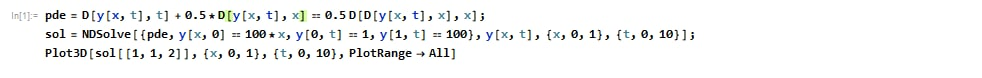
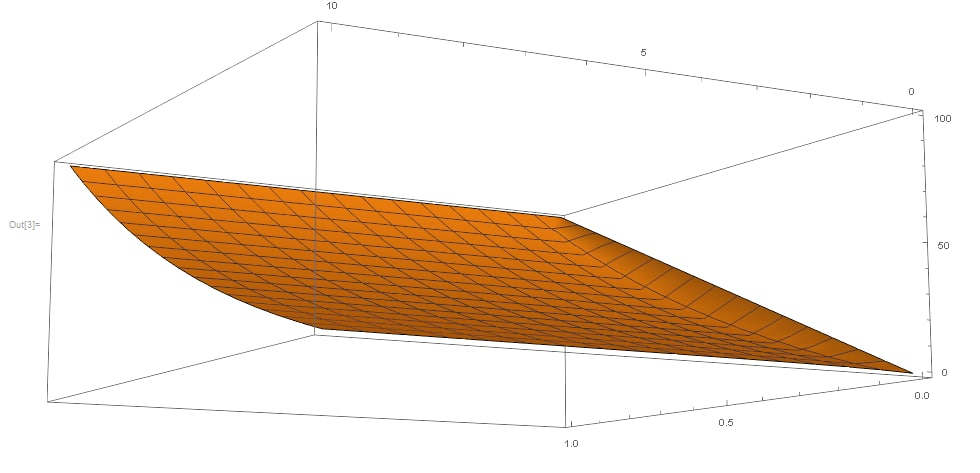

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import math
import time

In [10]:
alph = 0.5
u = 0.5
l = 1
N_s = 40 #кол-во узлов по пространствен. коорд.

time_sum = 10
time_1 = 0.1
time_2 = 0.5
time_3 = 1
time_4 = 5
time_5 = 10

# диффузионное число
d_1 = 0.1
d_2 = 0.5
d_3 = 0.6
d_4 = 2.5

In [11]:
def border_left(t):
    return 0
def border_right(t):
    return 100
def fun_initial(x, l):
    return (100 * x / l)

# 2. Явная двухслойная схема

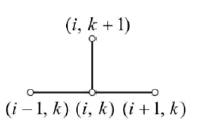

$$\frac{T_{k+1,i}-T_{k,i}}{\tau } +u\frac{T_{k,i+1}-T_{k, i-1}}{h}=a^{2}\frac{T_{k,i-1}-2T_{k,i}+T_{k, i+1}}{h^{2}}$$

In [12]:
def explicit_schem(N_s, d):
    h = l / N_s
    tau = d * (h * h) / alph**2
    c = u * tau / h
    N_t = int(time_sum / tau)
    print('Диффузионное число = ', d)
    print('Конвекционное число число = ', c)
    
    matrix = np.zeros((N_t + 1, N_s + 1), dtype = float)
    for i in range(1, N_s):
        matrix[0][i] = fun_initial(i*h, l)
    for i in range(0, N_t + 1):
        matrix[i][0] = border_left(i * tau)
        matrix[i][N_s] = border_right(i * tau)
    for i in range(1, N_t + 1):
        for j in range(1, N_s):
            matrix[i][j] = (d * (matrix[i - 1][j - 1] + matrix[i - 1][j + 1] - 2 * matrix[i - 1][j]) 
                            - c / 2 * (matrix[i-1][j+1]-matrix[i-1][j-1])
                            + matrix[i - 1][j])
    return matrix

In [13]:
def draw_explicit_schem(d, time_1, time_2, time_3, time_4, time_5):
    matrix_1 = explicit_schem(N_s, d)
    N_t, size_x = np.shape(matrix_1)
    x = np.linspace(0, l, size_x) 
    moment_1 = int((N_t*time_1)/time_sum)
    moment_2 = int((N_t*time_2)/time_sum)
    moment_3 = int((N_t*time_3)/time_sum)
    moment_4 = int((N_t*time_4)/time_sum)
    moment_5 = int((N_t*time_5)/time_sum)

    fg = plt.figure(figsize=(11, 6), constrained_layout=True)
    gs = fg.add_gridspec(4, 2)
    fig_ax_1 = fg.add_subplot(gs[1, 0])
    plt.title('Явная двухслойная схема, time = 0')
    plt.grid(True)
    plt.plot(x, matrix_1[0, :])
    fig_ax_2 = fg.add_subplot(gs[1, 1])
    plt.title('Явная двухслойная схема, time = 0.1')
    plt.grid(True)
    plt.plot(x, matrix_1[moment_1, :])
    fig_ax_3 = fg.add_subplot(gs[2, 0])
    plt.title('Явная двухслойная схема, time = 0.5')
    plt.grid(True)
    plt.plot(x, matrix_1[moment_2, :])
    fig_ax_4 = fg.add_subplot(gs[2, 1])
    plt.title('Явная двухслойная схема, time = 1')
    plt.grid(True)
    plt.plot(x, matrix_1[moment_3, :])
    fig_ax_5 = fg.add_subplot(gs[3, 0])
    plt.title('Явная двухслойная схема, time = 5')
    plt.grid(True)
    plt.plot(x, matrix_1[moment_4, :])
    fig_ax_6 = fg.add_subplot(gs[3, 1])
    plt.title('Явная двухслойная схема, time = 10')
    plt.grid(True)
    plt.plot(x, matrix_1[moment_5-3, :])

Диффузионное число =  0.1
Конвекционное число число =  0.005000000000000001


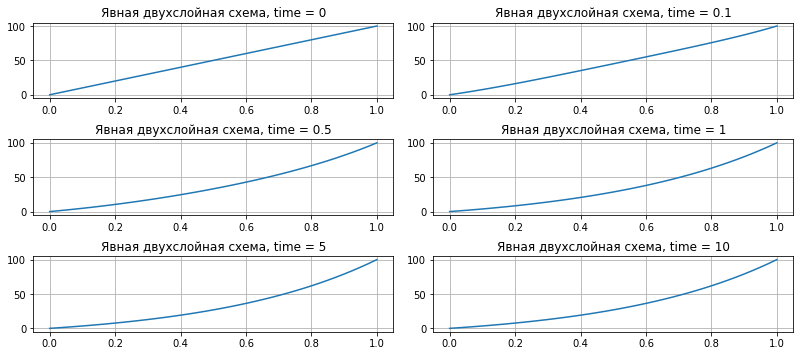

In [14]:
draw_explicit_schem(d_1, time_1, time_2, time_3, time_4, time_5)

Диффузионное число =  0.5
Конвекционное число число =  0.025000000000000005


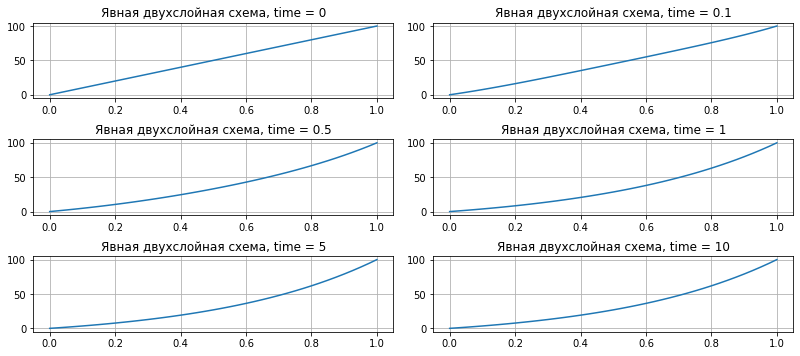

In [15]:
draw_explicit_schem(d_2, time_1, time_2, time_3, time_4, time_5)

Диффузионное число =  0.6
Конвекционное число число =  0.030000000000000002


<ipython-input-12-1d472e37bff8>:17: RuntimeWarning: overflow encountered in double_scalars
  matrix[i][j] = (d * (matrix[i - 1][j - 1] + matrix[i - 1][j + 1] - 2 * matrix[i - 1][j])
<ipython-input-12-1d472e37bff8>:17: RuntimeWarning: invalid value encountered in double_scalars
  matrix[i][j] = (d * (matrix[i - 1][j - 1] + matrix[i - 1][j + 1] - 2 * matrix[i - 1][j])
<ipython-input-12-1d472e37bff8>:18: RuntimeWarning: invalid value encountered in double_scalars
  - c / 2 * (matrix[i-1][j+1]-matrix[i-1][j-1])


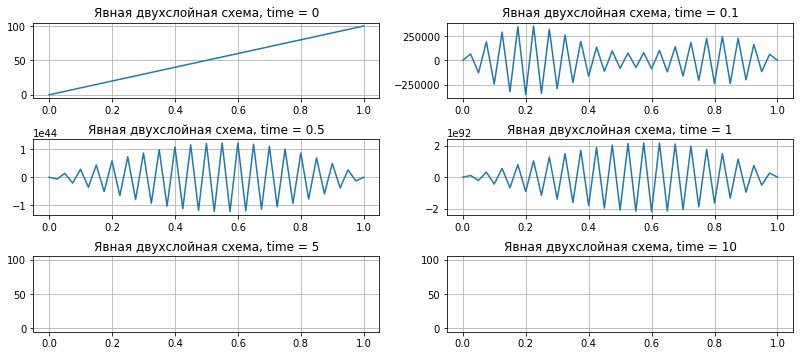

In [16]:
draw_explicit_schem(d_3, time_1, time_2, time_3, time_4, time_5)

Диффузионное число =  2.5
Конвекционное число число =  0.12500000000000003


<ipython-input-12-1d472e37bff8>:17: RuntimeWarning: overflow encountered in double_scalars
  matrix[i][j] = (d * (matrix[i - 1][j - 1] + matrix[i - 1][j + 1] - 2 * matrix[i - 1][j])
<ipython-input-12-1d472e37bff8>:17: RuntimeWarning: invalid value encountered in double_scalars
  matrix[i][j] = (d * (matrix[i - 1][j - 1] + matrix[i - 1][j + 1] - 2 * matrix[i - 1][j])
<ipython-input-12-1d472e37bff8>:18: RuntimeWarning: invalid value encountered in double_scalars
  - c / 2 * (matrix[i-1][j+1]-matrix[i-1][j-1])


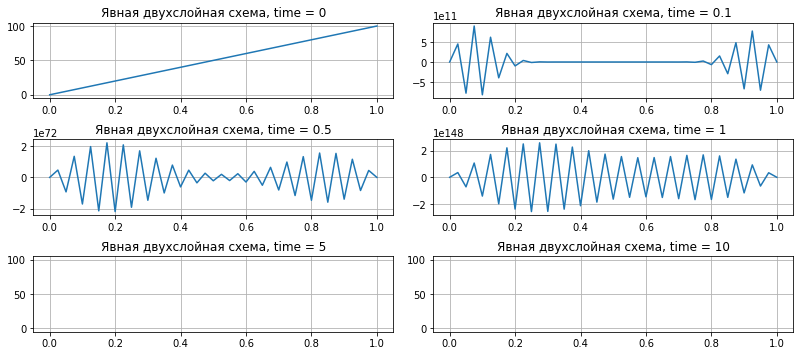

In [17]:
draw_explicit_schem(d_4, time_1, time_2, time_3, time_4, time_5)

# 2. Неявная двухслойная схема

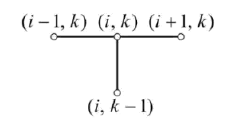
$$\frac{T_{k,i}-T_{k-1,i}}{\tau } +u\frac{T_{k,i+1}-T_{k, i-1}}{h}=a^{2}\frac{T_{k,i-1}-2T_{k,i}+T_{k, i+1}}{h^{2}}$$

In [91]:
def implicit_schem(N_s, d):
    h = l / N_s
    tau = d * (h * h) / alph
    c = u * tau / h
    N_t = int(time_sum / tau)
    print('Диффузионное число = ', d)
    print('Конвекционное число число = ', c)
    
    matrix = np.zeros((N_t + 1, N_s + 1), dtype = float)
    for i in range(1, N_s):
        matrix[0][i] = fun_initial(i*h, l)
    for i in range(0, N_t + 1):
        matrix[i][0] = border_left(i * tau)
        matrix[i][N_s] = border_right(i * tau)
        
    A = -(c / 2 + d)
    B = 1 + 2 * d
    C = (c / 2 - d)
    alpha = [0.] * N_s 
    beta = [0.] * N_s 
    for i in range(1, int(N_t+1)):
        alpha[0] = 0. 
        beta[0] = matrix[i - 1][0]
        for j in range(1, N_s):
            alpha[j] = - C / (B + A * alpha[j - 1])
            beta[j] = (matrix[i - 1][j] - A * beta[j - 1]) / (B + A * alpha[j - 1])
        for j in reversed(range(1, N_s)):
            matrix[i][j] = alpha[j] * matrix[i][j + 1] + beta[j]             
    #####################
    A = -(c / 2 + d)
    B = 1 + 2 * d
    C = (c / 2 - d)
    
    alpha = [0.] * columns
    beta = [0.] * columns

    for i in range(1, lines + 1):
        alpha[0] = 0.
        beta[0] = T[i - 1][0]

        for j in range(1, columns):
            alpha[j] = -C / (B + A * alpha[j - 1])
            beta[j] = (T[i - 1][j] - A * beta[j - 1]) / (B + A * alpha[j - 1])

        for j in reversed(range(1, columns)):
            T[i][j] = alpha[j] * T[i][j + 1] + beta[j]
    return matrix

In [96]:
def draw_implicit_schem(d, time_1, time_2, time_3, time_4, time_5):
    matrix_2 = implicit_schem(N_s, d)
    N_t, size_x = np.shape(matrix_2)
    x = np.linspace(0, l, size_x) 
    moment_1 = int((N_t*time_1)/time_sum)
    moment_2 = int((N_t*time_2)/time_sum)
    moment_3 = int((N_t*time_3)/time_sum)
    moment_4 = int((N_t*time_4)/time_sum)
    moment_5 = int((N_t*time_5)/time_sum)
    
    fg = plt.figure(figsize=(11, 6), constrained_layout=True)
    gs = fg.add_gridspec(4, 2)
    fig_ax_1 = fg.add_subplot(gs[1, 0])
    plt.title('Неявная двухслойная схема, time = 0')
    plt.grid(True)
    plt.plot(x, matrix_2[0, :])
    fig_ax_2 = fg.add_subplot(gs[1, 1])
    plt.title('Неявная двухслойная схема, time = 0.1')
    plt.grid(True)
    plt.plot(x, matrix_2[moment_1, :])
    fig_ax_3 = fg.add_subplot(gs[2, 0])
    plt.title('Неявная двухслойная схема, time = 0.5')
    plt.grid(True)
    plt.plot(x, matrix_2[moment_2, :])
    fig_ax_4 = fg.add_subplot(gs[2, 1])
    plt.title('Неявная двухслойная схема, time = 1')
    plt.grid(True)
    plt.plot(x, matrix_2[moment_3, :])
    fig_ax_5 = fg.add_subplot(gs[3, 0])
    plt.title('Неявная двухслойная схема, time = 5')
    plt.grid(True)
    plt.plot(x, matrix_2[moment_4, :])
    fig_ax_6 = fg.add_subplot(gs[3, 1])
    plt.title('Неявная двухслойная схема, time = 10')
    plt.grid(True)
    plt.plot(x, matrix_2[moment_5-1, :])

Диффузионное число =  0.1
Конвекционное число число =  0.0025000000000000005


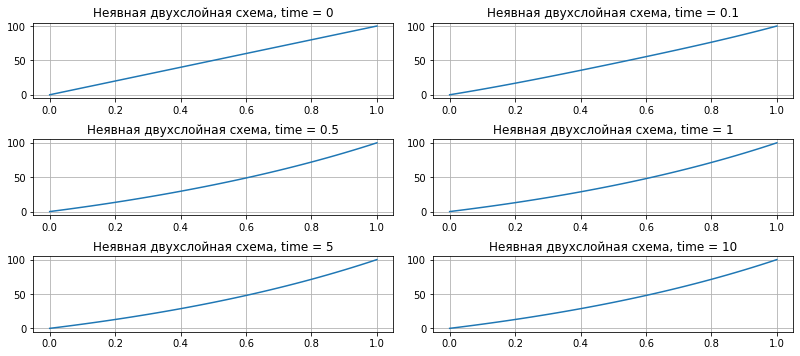

In [97]:
draw_implicit_schem(d_1, time_1, time_2, time_3, time_4, time_5)

Диффузионное число =  0.5
Конвекционное число число =  0.012500000000000002


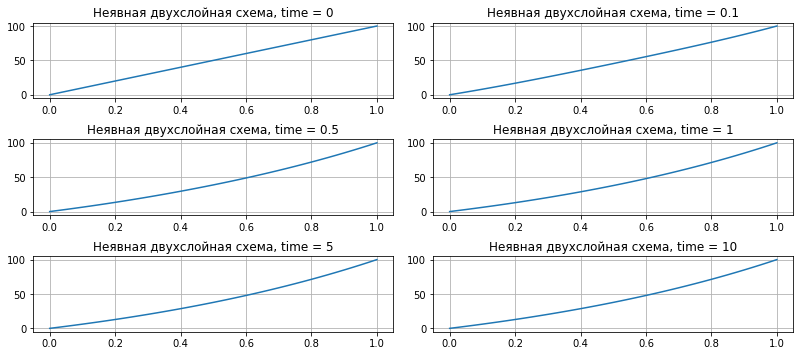

In [98]:
draw_implicit_schem(d_2, time_1, time_2, time_3, time_4, time_5)

Диффузионное число =  0.6
Конвекционное число число =  0.015000000000000001


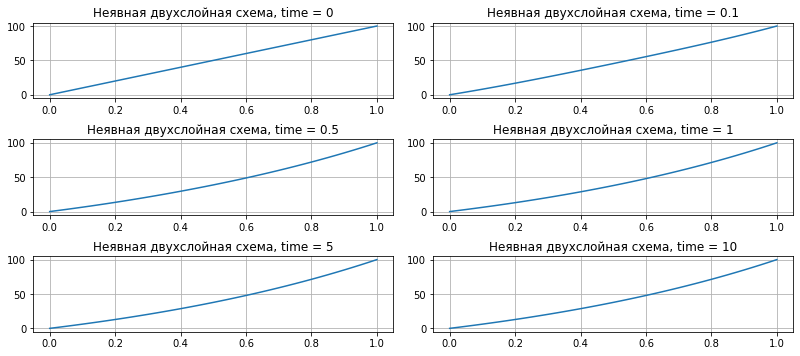

In [99]:
draw_implicit_schem(d_3, time_1, time_2, time_3, time_4, time_5)

Диффузионное число =  2.5
Конвекционное число число =  0.06250000000000001


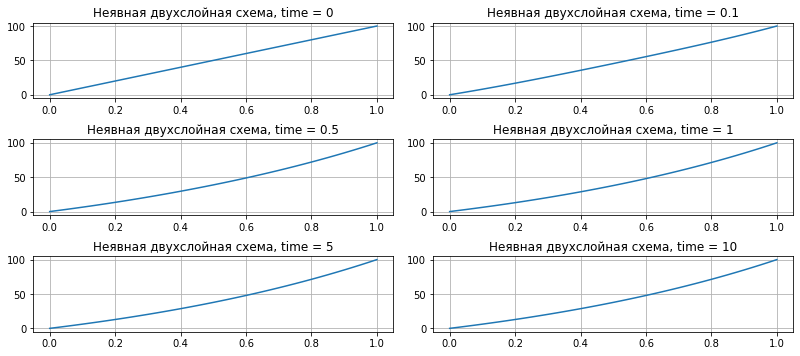

In [100]:
draw_implicit_schem(d_4, time_1, time_2, time_3, time_4, time_5)